# Mamdani - HVAC Control System
This notebook demonstrates a Mamdani fuzzy inference system for controlling an HVAC system based on indoor temperature, humidity, and CO2 levels.

In [22]:
# Imports necessary modules/packages and sets up the environment for experimentation.
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload

# Navigate up to the project root directory dynamically.
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

# Add the project root to the system path to import custom modules from mylibs package.
sys.path.append(project_root)

# Import the custom module from the mylibs package.
import mylibs.membership_functions as mf
import hvac_control_app as app

### 1. Design Membership
An given input values is translated into fuzzy reading using the membership function defined previously

Observation:

- For one input value, one or more output can be produced though fuzification depending on the class membership(s)
- Hence, when an input provided, the membership degree should be expressed as in one or more fuzzified output

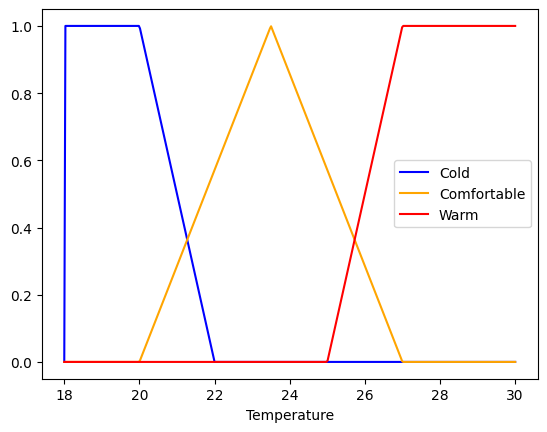

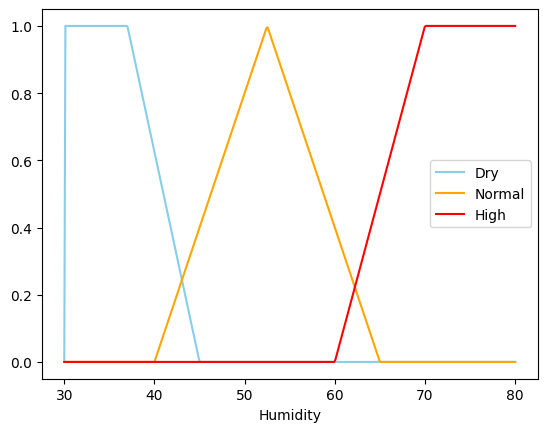

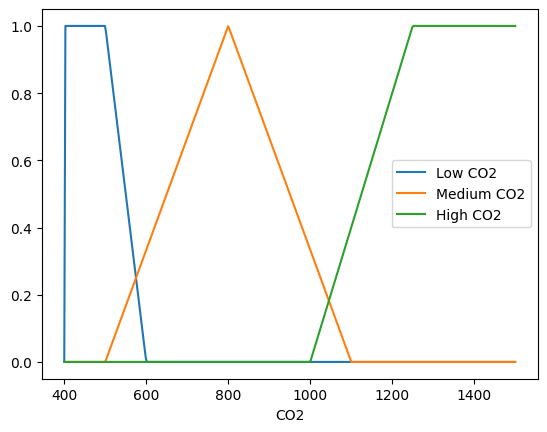

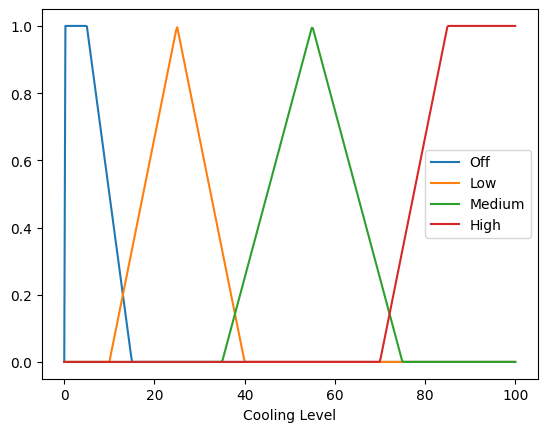

In [23]:
# Soiledness Membership Functions
temp = np.linspace(18, 30, 400)
cold_temp = np.array([mf.trap(x, 18, 18, 20, 22) for x in temp])
comfortable_temp = np.array([mf.tri(x, 20, 23.5, 27) for x in temp])
warm_temp = np.array([mf.trap(x, 25, 27, 30, 30) for x in temp])

humid = np.linspace(30, 80, 400)
dry_humid = np.array([mf.trap(x, 30, 30, 37, 45) for x in humid])
normal_humid = np.array([mf.tri(x, 40, 52.5, 65) for x in humid])
high_humid = np.array([mf.trap(x, 60, 70, 80, 80) for x in humid])

co2 = np.linspace(400, 1500, 400)
low_co2 = np.array([mf.trap(x, 400, 400, 500, 600) for x in co2])
medium_co2 = np.array([mf.tri(x, 500, 800, 1100) for x in co2])
high_co2 = np.array([mf.trap(x, 1000, 1250, 1500, 1500) for x in co2])

hvac_level = np.linspace(0, 100, 400)
off_hvac = np.array([mf.trap(x, 0, 0, 5, 15) for x in hvac_level])
low_hvac = np.array([mf.tri(x, 10, 25, 40) for x in hvac_level])
medium_hvac = np.array([mf.tri(x, 35, 55, 75) for x in hvac_level])
high_hvac = np.array([mf.trap(x, 70, 85, 100, 100) for x in hvac_level])

# TODO: Update uniform color for the plots.
# Indoor Temperature, Humidity and CO2 Plots
plt.figure(0)
plt.plot(temp, cold_temp, label="Cold", color="blue")
plt.plot(temp, comfortable_temp, label="Comfortable", color="orange")
plt.plot(temp, warm_temp, label="Warm", color="red")
plt.legend()
plt.xlabel("Temperature")

plt.figure(1)
plt.plot(humid, dry_humid, label="Dry", color="skyblue")
plt.plot(humid, normal_humid, label="Normal", color="orange")
plt.plot(humid, high_humid, label="High", color="red")
plt.legend()
plt.xlabel("Humidity")

plt.figure(2)
plt.plot(co2, low_co2, label="Low CO2")
plt.plot(co2, medium_co2, label="Medium CO2")
plt.plot(co2, high_co2, label="High CO2")
plt.legend()
plt.xlabel("CO2")

# Cooling Level Plots
plt.figure(3)
plt.plot(hvac_level, off_hvac, label="Off")
plt.plot(hvac_level, low_hvac, label="Low")
plt.plot(hvac_level, medium_hvac, label="Medium")
plt.plot(hvac_level, high_hvac, label="High")
plt.legend()
plt.xlabel("Cooling Level")
plt.show()

### 1. Fuzzification

Input gets fuzzified.

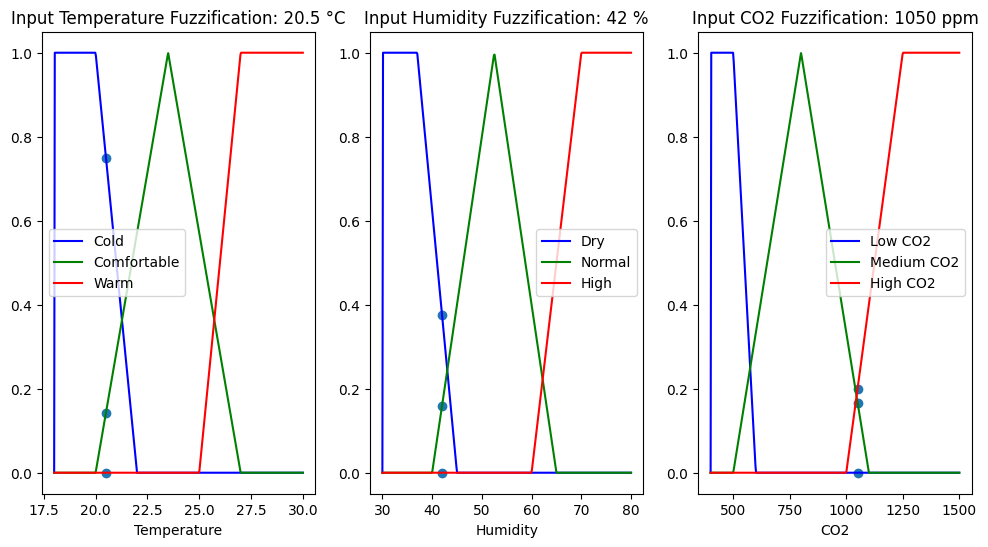

################################################################################
#temperature input: 20.5 °C
fuzzified in_cold_temp: 0.75
fuzzified in_comfortable_temp: 0.14285714285714285
fuzzified in_warm_temp: 0
################################################################################
#humidity input: 42 %
fuzzified in_dry_humid: 0.375
fuzzified in_normal_humid: 0.16
fuzzified in_high_humid: 0
################################################################################
#CO2 input: 1050 ppm
fuzzified in_low_co2: 0
fuzzified in_medium_co2: 0.16666666666666666
fuzzified in_high_co2: 0.2
################################################################################


In [24]:
# Inputs needs to fuzzified using the membership functions defined above.
in_temp = 20.5
in_cold_temp = mf.trap(in_temp, 18, 18, 20, 22)  # take middle point of the trap
in_comfortable_temp = mf.tri(in_temp, 20, 23.5, 27)  # take middle point of the tri
in_warm_temp = mf.trap(in_temp, 25, 27, 30, 30)  # take middle point of the trap

in_humid = 42
in_dry_humid = mf.trap(in_humid, 30, 30, 37, 45)  # take middle point of the trap
in_normal_humid = mf.tri(in_humid, 40, 52.5, 65)  # take middle point of the tri
in_high_humid = mf.trap(in_humid, 60, 70, 80, 80)  # take middle point of the trap

in_co2 = 1050
in_low_co2 = mf.trap(in_co2, 400, 400, 500, 600)  # take middle point of the trap
in_medium_co2 = mf.tri(in_co2, 500, 800, 1100)  # take middle point of the tri
in_high_co2 = mf.trap(in_co2, 1000, 1250, 1500, 1500)  # take middle point of the trap

# Temperature Plots with input fuzzified points
plt.figure(0, figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(temp, cold_temp, label="Cold", color="blue")
plt.plot(temp, comfortable_temp, label="Comfortable", color="green")
plt.plot(temp, warm_temp, label="Warm", color="red")

plt.scatter(
    [in_temp, in_temp, in_temp], [in_cold_temp, in_comfortable_temp, in_warm_temp]
)
plt.xlabel("Temperature")
plt.title(f"Input Temperature Fuzzification: {in_temp} °C")
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(humid, dry_humid, label="Dry", color="blue")
plt.plot(humid, normal_humid, label="Normal", color="green")
plt.plot(humid, high_humid, label="High", color="red")

plt.scatter(
    [in_humid, in_humid, in_humid], [in_dry_humid, in_normal_humid, in_high_humid]
)
plt.xlabel("Humidity")
plt.title(f"Input Humidity Fuzzification: {in_humid} %")
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(co2, low_co2, label="Low CO2", color="blue")
plt.plot(co2, medium_co2, label="Medium CO2", color="green")
plt.plot(co2, high_co2, label="High CO2", color="red")

plt.scatter([in_co2, in_co2, in_co2], [in_low_co2, in_medium_co2, in_high_co2])
plt.xlabel("CO2")
plt.title(f"Input CO2 Fuzzification: {in_co2} ppm")
plt.legend()
plt.show()

print(
    f"################################################################################"
)
print(f"#temperature input: {in_temp} °C")
print(f"fuzzified in_cold_temp: {in_cold_temp}")
print(f"fuzzified in_comfortable_temp: {in_comfortable_temp}")
print(f"fuzzified in_warm_temp: {in_warm_temp}")
print(
    f"################################################################################"
)
print(f"#humidity input: {in_humid} %")
print(f"fuzzified in_dry_humid: {in_dry_humid}")
print(f"fuzzified in_normal_humid: {in_normal_humid}")
print(f"fuzzified in_high_humid: {in_high_humid}")
print(
    f"################################################################################"
)
print(f"#CO2 input: {in_co2} ppm")
print(f"fuzzified in_low_co2: {in_low_co2}")
print(f"fuzzified in_medium_co2: {in_medium_co2}")
print(f"fuzzified in_high_co2: {in_high_co2}")
print(
    f"################################################################################"
)

### 2. Rules
Must Do Composition with the Output - to evaluate the rules <p> 
A*B?? because R1 & R2 are matrices.

`np.fmin` - compares two arrays and returns a new array with the minima <a href=https://www.geeksforgeeks.org/python/numpy-fmin-in-python>Ref</a>

R1 = np.fmin(in_less_s,less_t) - compares ~0.7 with array and returns the minima

<p> Question: fmin returns minima and doesn't do max-min! So, how two matrices get composed?

In [ ]:
reload(mf)
# Evaluation of Rules - using A-> to check antecedent and consequence.
antecedent_1 = min(in_comfortable_temp, in_normal_humid, in_low_co2)
antecedent_2 = min(in_comfortable_temp, in_normal_humid, in_medium_co2)
antecedent_3 = min(in_cold_temp, in_normal_humid)
antecedent_4 = min(in_warm_temp, in_normal_humid)
antecedent_5 = in_high_humid
antecedent_6 = in_high_co2
antecedent_7 = min(in_warm_temp, in_high_humid, in_high_co2)

consequence_1 = np.minimum(antecedent_1, off_hvac)  # No one in the room -> turn off
consequence_2 = np.minimum(antecedent_2, low_hvac)  # Got people can save -> turn on low
consequence_3 = np.minimum(
    antecedent_3, low_hvac
)  # Preserve room comfort -> turn on low
consequence_4 = np.minimum(
    antecedent_4, medium_hvac
)  # Preserve room comfort -> turn on medium
consequence_5 = np.minimum(
    antecedent_5, medium_hvac
)  # Some activities going on -> turn on medium
consequence_6 = np.minimum(
    antecedent_6, high_hvac
)  # High Co2 is danger -> turn on high
consequence_7 = np.minimum(
    antecedent_7, high_hvac
)  # Extreme conditions -> turn on high

In [26]:
# summarize the Rules
R = np.maximum.reduce(
    [
        consequence_1,
        consequence_2,
        consequence_3,
        consequence_4,
        consequence_5,
        consequence_6,
        consequence_7,
    ]
)

### 3. Defuzzification 
Centroid - centre of any random 2D object. Integral used for finding the centroid.<p>
R forms a regions (union of R1 & R2). So, centre point of R is the defuzzified answer!

Why Y-axis centroid not calculated?<p>
- Because Y-axis is membership and only X-axis is the value that is needed.

Cooling Level :  59.223773881266595


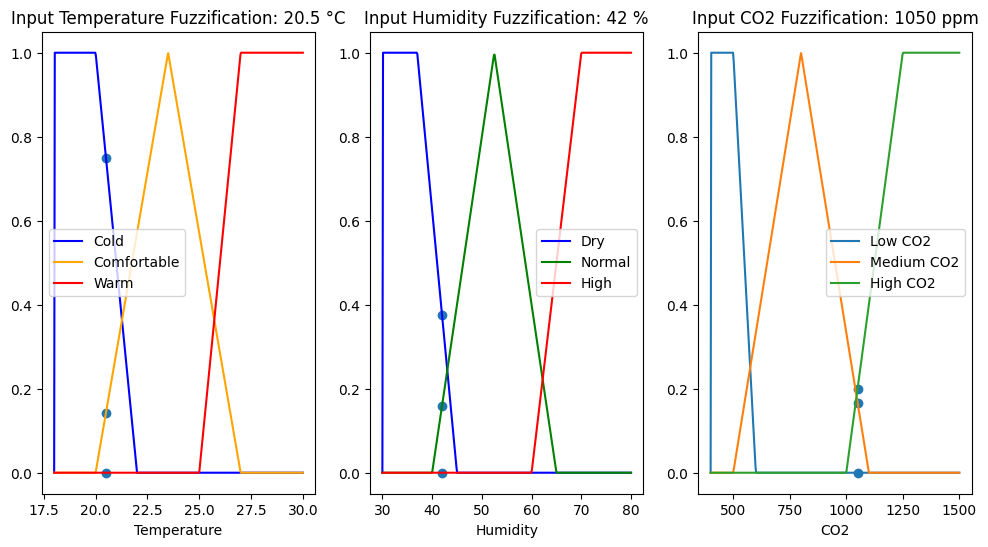

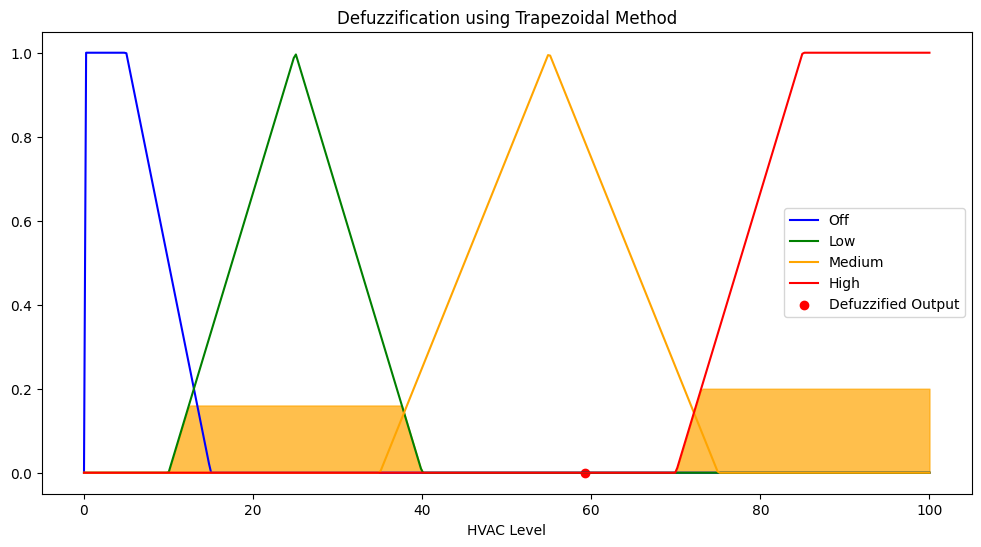

In [27]:
reload(mf)
# Defuzzification
res = mf.defuzzify_trap(hvac_level, R)
print("Cooling Level : ", res)

# Cooling Level Plot with defuzzified point
plt.figure(0, figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(temp, cold_temp, label="Cold", color="blue")
plt.plot(temp, comfortable_temp, label="Comfortable", color="orange")
plt.plot(temp, warm_temp, label="Warm", color="red")

plt.scatter(
    [in_temp, in_temp, in_temp], [in_cold_temp, in_comfortable_temp, in_warm_temp]
)
plt.xlabel("Temperature")
plt.title(f"Input Temperature Fuzzification: {in_temp} °C")
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(humid, dry_humid, label="Dry", color="blue")
plt.plot(humid, normal_humid, label="Normal", color="green")
plt.plot(humid, high_humid, label="High", color="red")

plt.scatter(
    [in_humid, in_humid, in_humid], [in_dry_humid, in_normal_humid, in_high_humid]
)
plt.xlabel("Humidity")
plt.title(f"Input Humidity Fuzzification: {in_humid} %")
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(co2, low_co2, label="Low CO2")
plt.plot(co2, medium_co2, label="Medium CO2")
plt.plot(co2, high_co2, label="High CO2")

plt.scatter([in_co2, in_co2, in_co2], [in_low_co2, in_medium_co2, in_high_co2])
plt.xlabel("CO2")
plt.title(f"Input CO2 Fuzzification: {in_co2} ppm")
plt.legend()

plt.figure(1, figsize=(12, 6))
plt.plot(hvac_level, off_hvac, label="Off", color="blue")
plt.plot(hvac_level, low_hvac, label="Low", color="green")
plt.plot(hvac_level, medium_hvac, label="Medium", color="orange")
plt.plot(hvac_level, high_hvac, label="High", color="red")
plt.fill_between(hvac_level, np.zeros_like(hvac_level), R, color="orange", alpha=0.7)
plt.scatter([res], [0], color="red", label="Defuzzified Output")
plt.xlabel("HVAC Level")
# plt.title("Defuzzification using Centroid Method")
plt.title("Defuzzification using Trapezoidal Method")
plt.legend()
plt.show()

### 4. Test Case

HVAC Control System using Fuzzy Logic
Input Temperature: 22.0 °C
Input Humidity: 50.0
Input CO₂: 500.0 ppm
Temperature Category: Comfortable (μ=0.57)
Humidity Category: Normal (μ=0.80)
CO₂ Category: Low (μ=1.00)
Recommended Cooling Level: 6.25 %
Cooling Category: Off (μ=0.88)
Input Summary:
 - Temperature: 22.0 °C (Comfortable)
 - Humidity: 50.0 % (Normal)
 - CO₂: 500.0 ppm (Low)
Recommended Cooling Level: 6.25 % (Off)


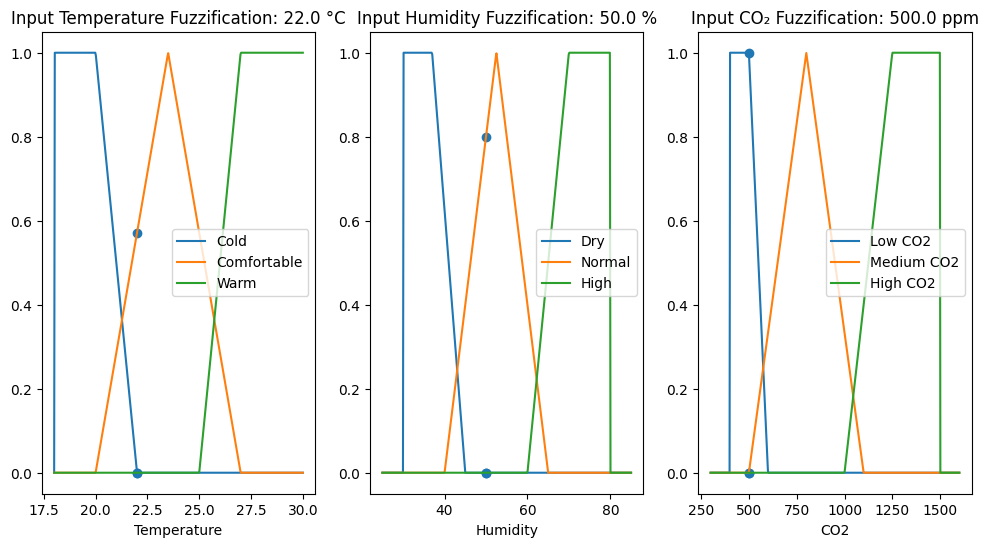

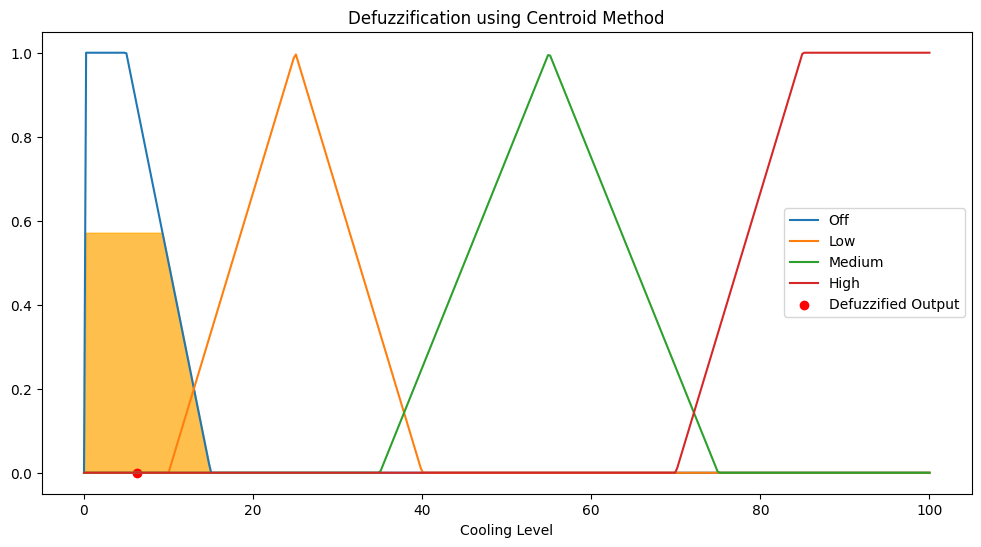

In [28]:
"""Rule 1 : Low CO₂ → Off"""

reload(app)
app.hvac_control_app(22, 50, 500)

HVAC Control System using Fuzzy Logic
Input Temperature: 23.0 °C
Input Humidity: 50.0
Input CO₂: 950.0 ppm
Temperature Category: Comfortable (μ=0.86)
Humidity Category: Normal (μ=0.80)
CO₂ Category: Medium (μ=0.50)
Recommended Cooling Level: 25.00 %
Cooling Category: Low (μ=1.00)
Input Summary:
 - Temperature: 23.0 °C (Comfortable)
 - Humidity: 50.0 % (Normal)
 - CO₂: 950.0 ppm (Medium)
Recommended Cooling Level: 25.00 % (Low)


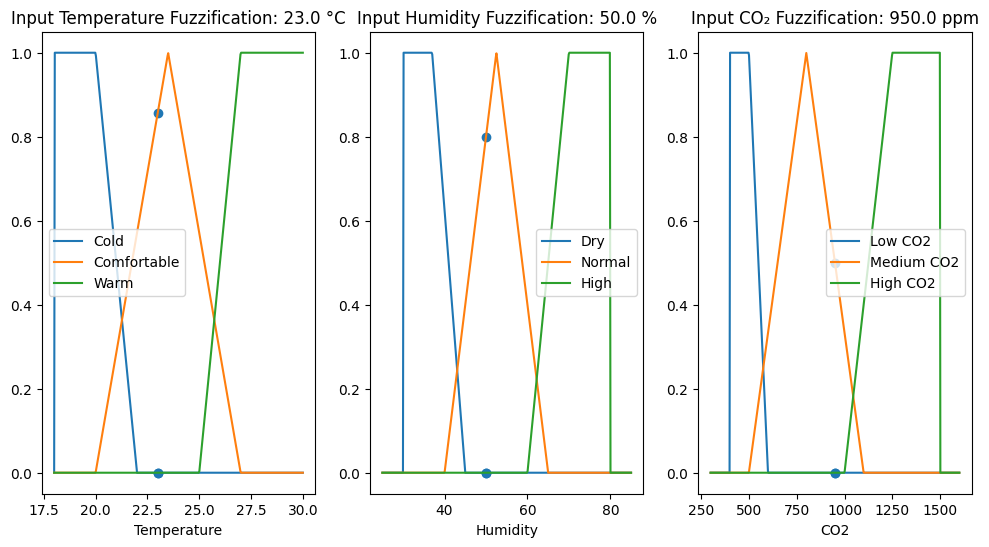

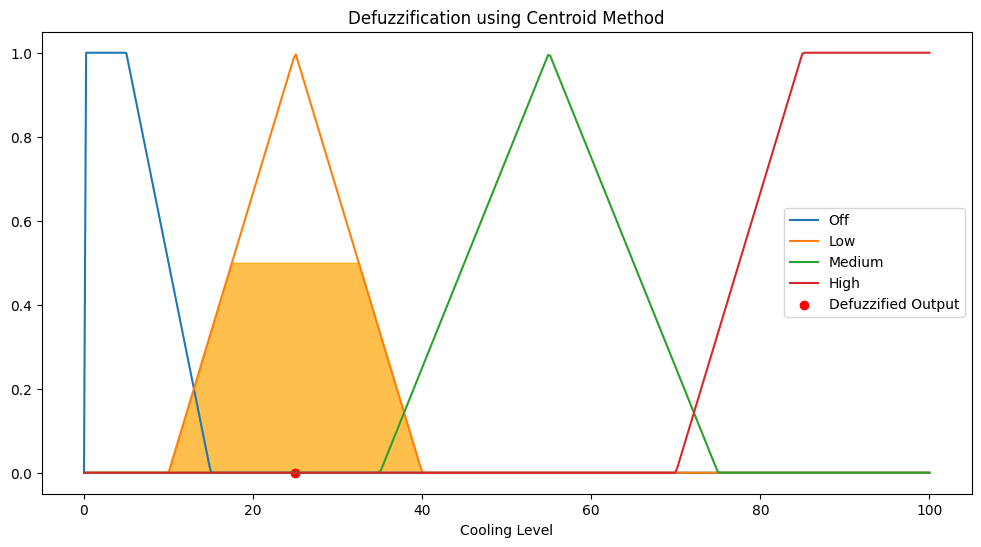

In [29]:
"""Rule 2 : Medium CO₂ ∧ Comfortable Temp → Low"""

reload(app)
app.hvac_control_app(23, 50, 950)

HVAC Control System using Fuzzy Logic
Input Temperature: 28.0 °C
Input Humidity: 50.0
Input CO₂: 950.0 ppm
Temperature Category: Warm (μ=1.00)
Humidity Category: Normal (μ=0.80)
CO₂ Category: Medium (μ=0.50)
Recommended Cooling Level: 55.00 %
Cooling Category: Medium (μ=1.00)
Input Summary:
 - Temperature: 28.0 °C (Warm)
 - Humidity: 50.0 % (Normal)
 - CO₂: 950.0 ppm (Medium)
Recommended Cooling Level: 55.00 % (Medium)


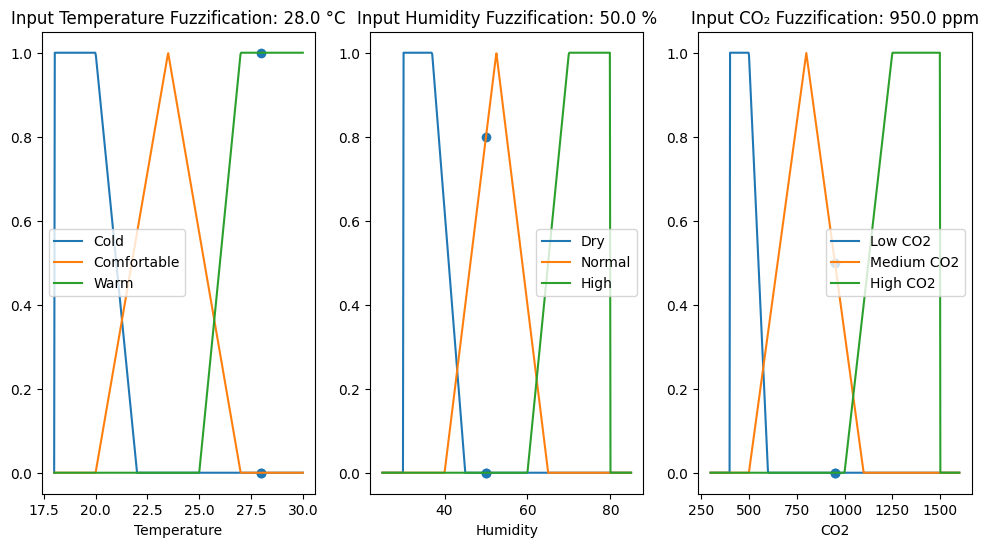

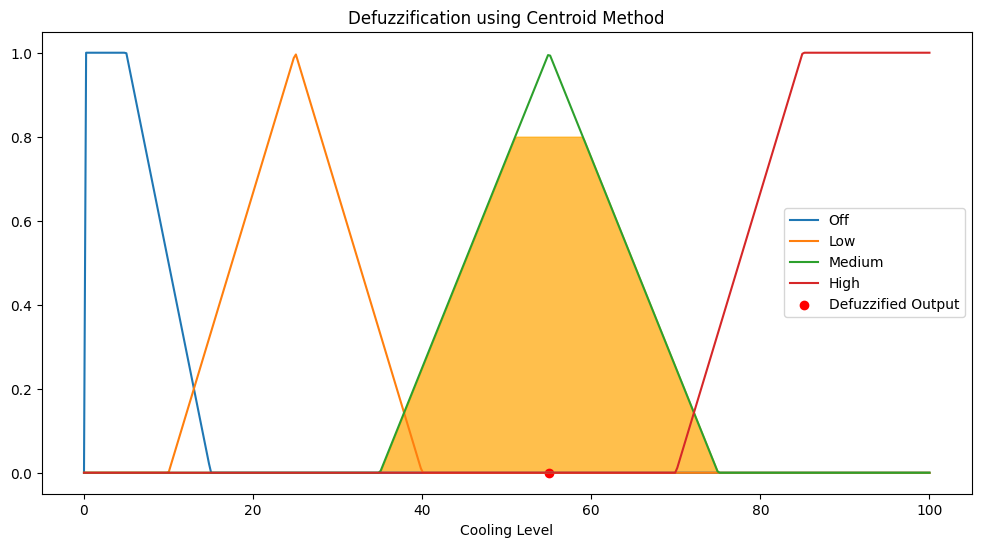

In [30]:
"""Rule 3 : Medium CO₂ ∧ Warm Temp → Medium"""

reload(app)
app.hvac_control_app(28, 50, 950)

HVAC Control System using Fuzzy Logic
Input Temperature: 29.0 °C
Input Humidity: 50.0
Input CO₂: 1300.0 ppm
Temperature Category: Warm (μ=1.00)
Humidity Category: Normal (μ=0.80)
CO₂ Category: High (μ=1.00)
Recommended Cooling Level: 72.99 %
Cooling Category: High (μ=0.20)
Input Summary:
 - Temperature: 29.0 °C (Warm)
 - Humidity: 50.0 % (Normal)
 - CO₂: 1300.0 ppm (High)
Recommended Cooling Level: 72.99 % (High)


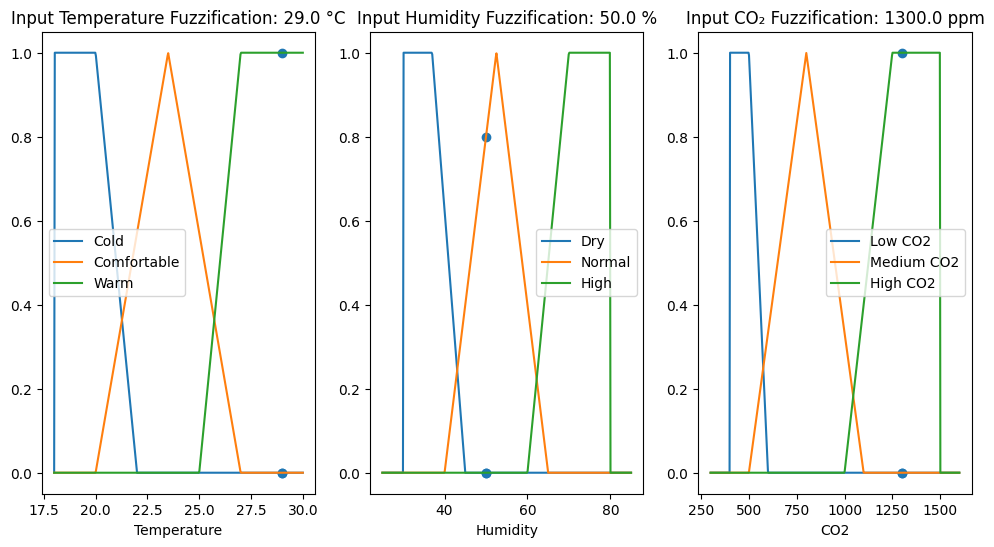

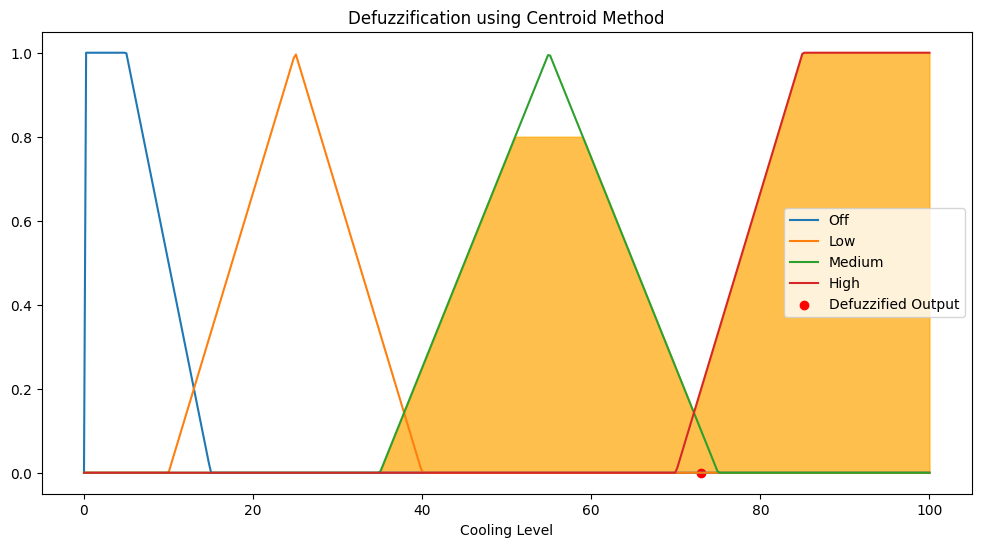

In [31]:
"""Rule 4 : High CO₂ ∧ Warm Temp → High"""

reload(app)
app.hvac_control_app(29, 50, 1300)

HVAC Control System using Fuzzy Logic
Input Temperature: 24.0 °C
Input Humidity: 75.0
Input CO₂: 1300.0 ppm
Temperature Category: Comfortable (μ=0.86)
Humidity Category: High (μ=1.00)
CO₂ Category: High (μ=1.00)
Recommended Cooling Level: 72.65 %
Cooling Category: High (μ=0.18)
Input Summary:
 - Temperature: 24.0 °C (Comfortable)
 - Humidity: 75.0 % (High)
 - CO₂: 1300.0 ppm (High)
Recommended Cooling Level: 72.65 % (High)


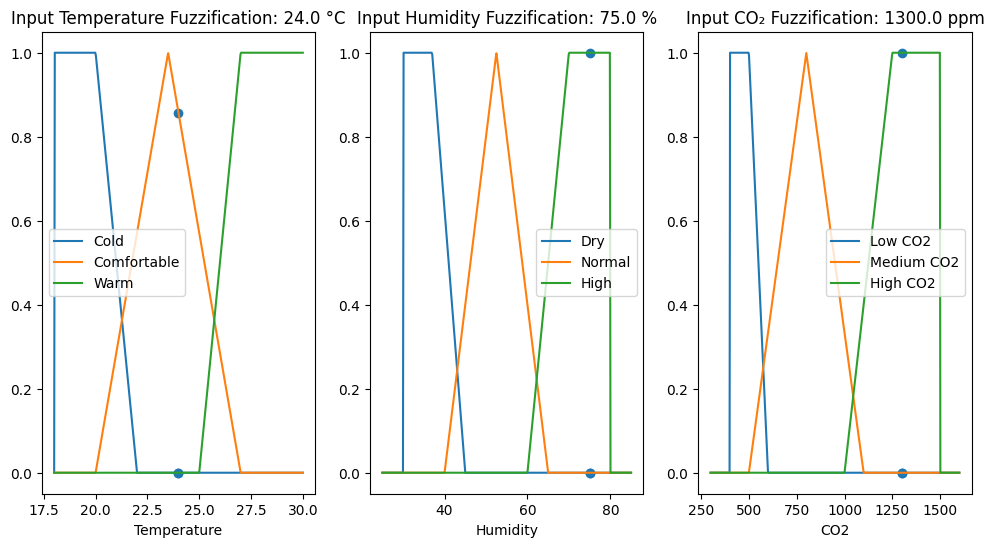

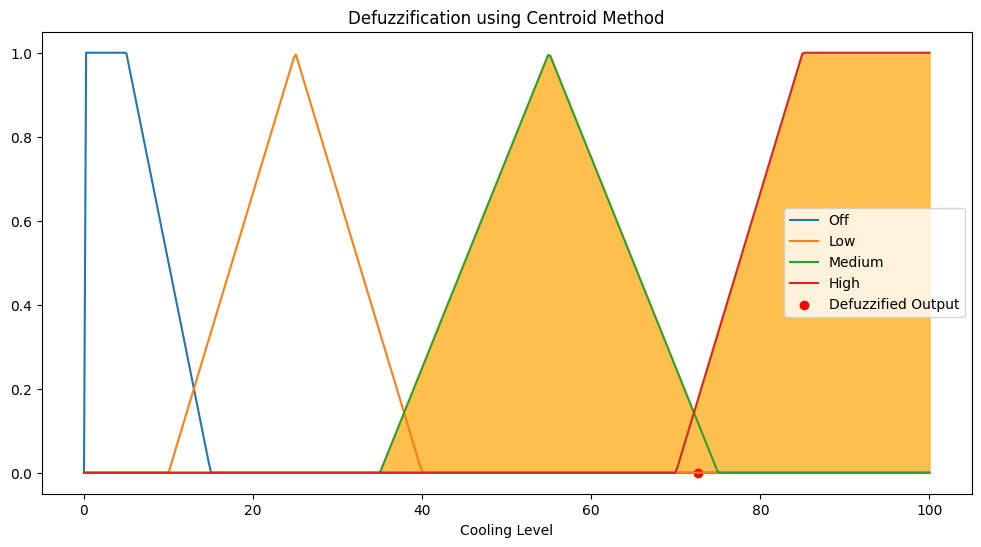

In [32]:
"""Rule 5 : High CO₂ ∧ High Humidity → High"""

reload(app)
app.hvac_control_app(24, 75, 1300)

HVAC Control System using Fuzzy Logic
Input Temperature: 24.0 °C
Input Humidity: 75.0
Input CO₂: 950.0 ppm
Temperature Category: Comfortable (μ=0.86)
Humidity Category: High (μ=1.00)
CO₂ Category: Medium (μ=0.50)
Recommended Cooling Level: 55.00 %
Cooling Category: Medium (μ=1.00)
Input Summary:
 - Temperature: 24.0 °C (Comfortable)
 - Humidity: 75.0 % (High)
 - CO₂: 950.0 ppm (Medium)
Recommended Cooling Level: 55.00 % (Medium)


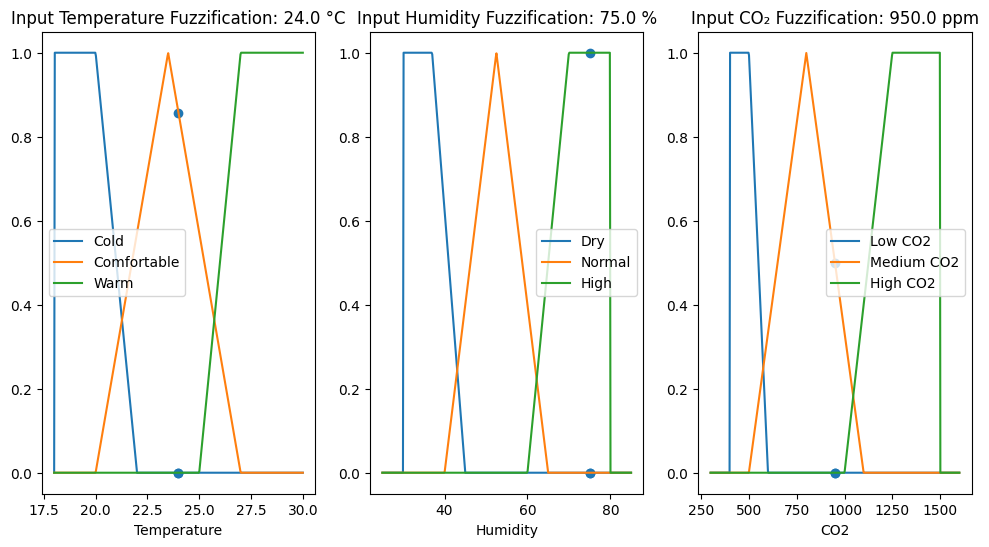

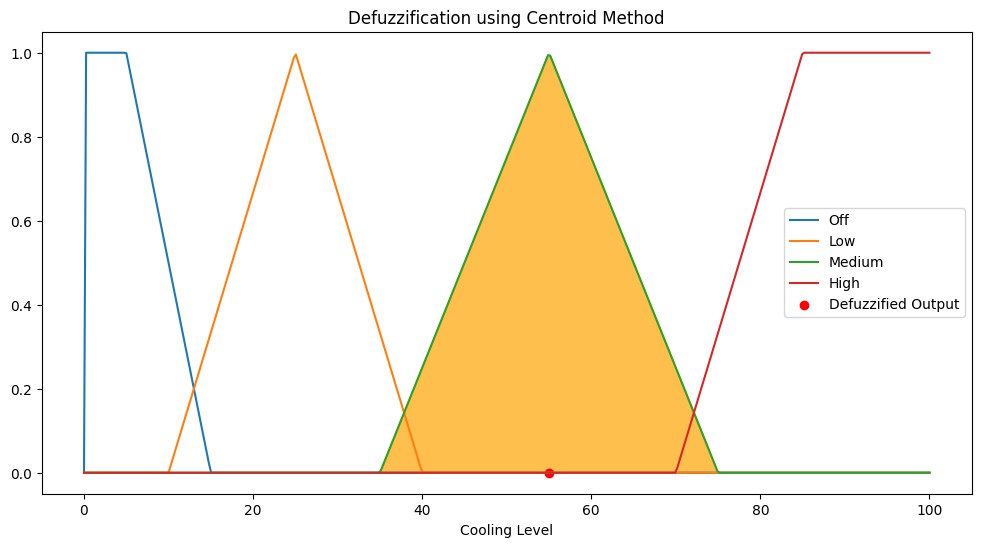

In [33]:
"""Rule 6 : Medium CO₂ ∧ High Humidity → Medium"""

reload(app)
app.hvac_control_app(24, 75, 950)

HVAC Control System using Fuzzy Logic
Input Temperature: 23.0 °C
Input Humidity: 50.0
Input CO₂: 1300.0 ppm
Temperature Category: Comfortable (μ=0.86)
Humidity Category: Normal (μ=0.80)
CO₂ Category: High (μ=1.00)
Recommended Cooling Level: 88.33 %
Cooling Category: High (μ=1.00)
Input Summary:
 - Temperature: 23.0 °C (Comfortable)
 - Humidity: 50.0 % (Normal)
 - CO₂: 1300.0 ppm (High)
Recommended Cooling Level: 88.33 % (High)


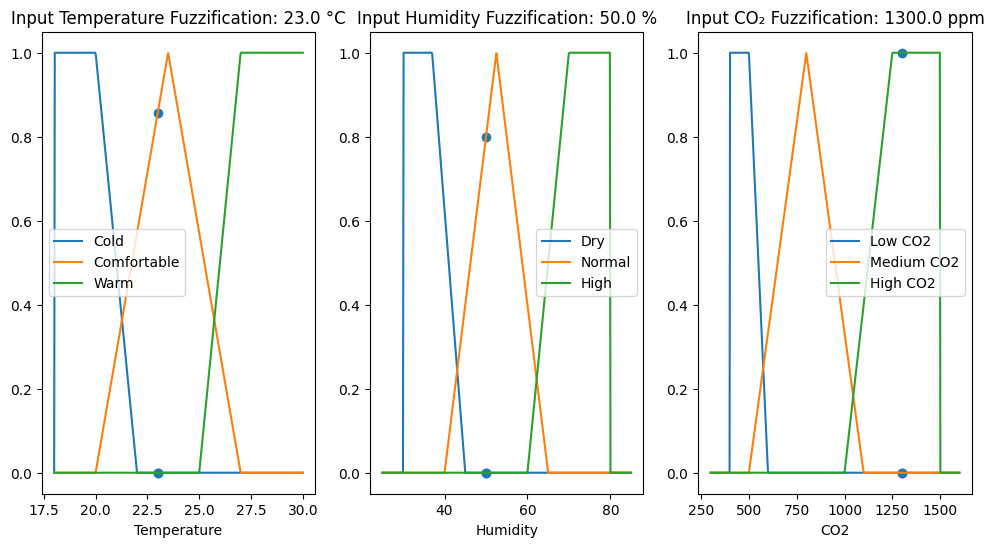

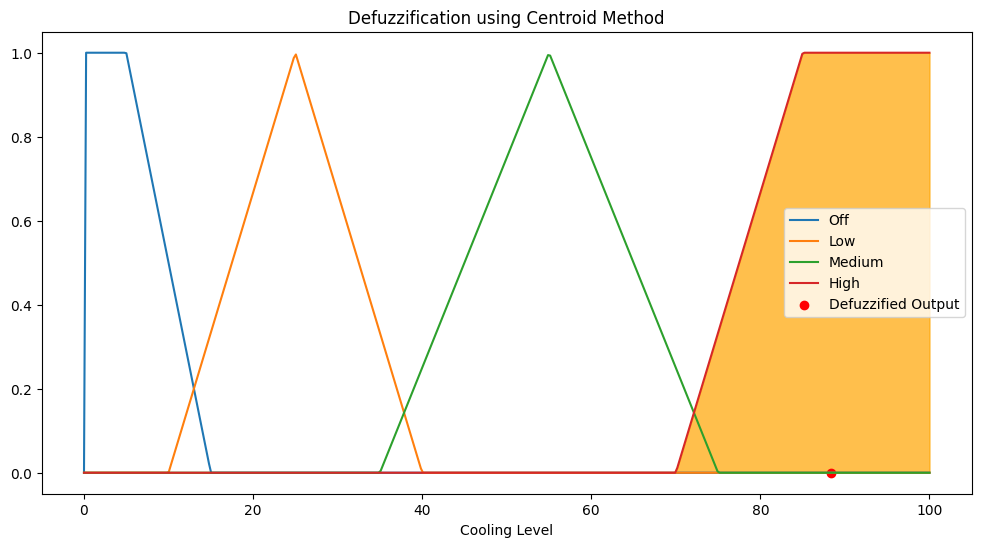

In [34]:
"""Rule 7 : High CO₂ ∧ Comfortable Temp → Medium"""

reload(app)
app.hvac_control_app(23, 50, 1300)